In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model



In [ ]:
# Paths
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"


In [ ]:

# Data Preparation
x_data = []
y_data = []

# Process Training Images
for category in glob(os.path.join(train_path, "*")):  # Use os.path.join for cross-platform compatibility
    label = os.path.basename(category)  # Get folder name as label
    for file in tqdm(glob(os.path.join(category, "*")), desc=f"Processing {label}"):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(label)


In [ ]:

# Create DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Display Dataset Info
print(f"Dataset contains {len(data)} samples")
print(data['label'].value_counts())


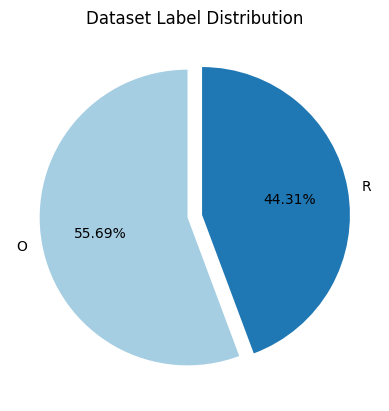

In [2]:

# Visualization
colors = plt.cm.Paired.colors  # Automatically generate colors
labels = data['label'].value_counts().index.tolist()
plt.pie(
    data['label'].value_counts(), 
    labels=labels, 
    autopct='%0.2f%%', 
    colors=colors[:len(labels)],  # Use a subset of colors
    startangle=90, 
    explode=[0.05] * len(labels)  # Dynamic explode for all classes
)
plt.title("Dataset Label Distribution")
plt.show()
